In [1]:
import numpy as np 
import time
import scipy

In [2]:
from astropy import units

In [3]:
from matplotlib import pyplot as plt

In [4]:
from galpy.df import dehnendf

  Referenced from: /Users/drewturton/.local/lib/python3.7/site-packages/libgalpy.cpython-37m-darwin.so
  Reason: image not found' 


In [5]:
dfc = dehnendf(beta = 0.)

In [6]:
from galpy.orbit import Orbit

In [7]:


start = time.time()

#o = Orbit(dfc.sample(n= 4000, returnOrbit = True, nphi = 1 ))
o = np.loadtxt('/Users/drewturton/desktop/diskdf-sample-for-lily.dat')

end = time.time()


In [8]:
print(end-start)

print(np.shape(o))


print(o[:, 0])

0.41325831413269043
(37740, 4)
[0.89821935 1.02013089 1.04061353 ... 1.03471018 1.00293268 1.00535235]


In [9]:
#set the sun at x = 1, y = 0 
#create a radius of 1kpc around the sun which is 0.125 in galpy units 

#dist = np.sqrt(((o[0]-1))**2+o[1]**2)

#oc = o[dist <= 0.125]


#print(np.shape(oc))

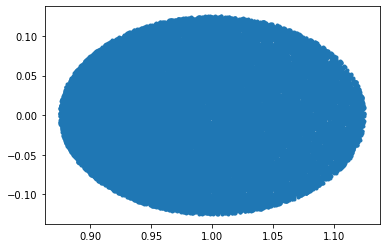

In [10]:


plt.plot(o[:,0], o[:, 1], '.')



In [11]:
from galpy.util.bovy_coords import rect_to_cyl_vec
from galpy.util.bovy_coords import rect_to_cyl

(37740,)


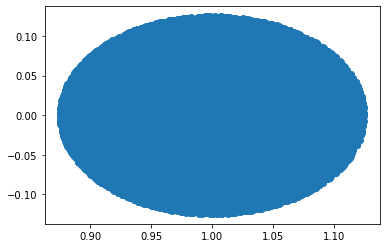

In [12]:
from galpy.orbit import Orbit

x = o[:,0]
y = o[:,1]
vx = o[:,2]
vy = o[:,3]


arr = np.array(((0,)*4,)*37740, float)

arr[:,0] = rect_to_cyl(x, y, 0)[0]   #R (X, Y, Z) -> (R, phi, Z) 
arr[:, 1] = rect_to_cyl_vec(vx, vy, 0, x, y, 0, cyl = False)[0] 
arr[:, 2] = rect_to_cyl_vec(vx, vy, 0, x, y, 0, cyl = False)[1] 
arr[:, 3] = rect_to_cyl(x, y, 0)[1]  #phi (X, Y, Z) -> (R, phi, Z) 


oc = Orbit(arr)  
print(np.shape(oc))

plt.plot(oc.x(), oc.y(), 'o')



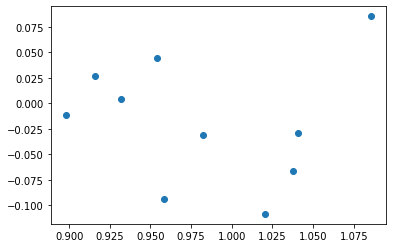

In [13]:
op = oc[0:10]
opp = oc[0:10]

plt.plot(op.x(), op.y(), 'o')

In [14]:
from galpy.potential import PowerSphericalPotential

In [15]:
import numpy as np
from astropy import units

def lp(a):
    return PowerSphericalPotential(amp=1.,alpha=a,normalize=True,r1=1.,ro=None,vo=None)
#for density 0 to 3 do fractionals 

#a_arr = ((0, 1, 2, 3))

h = lp(2)
ts = np.linspace(0.,100.,1000)
op.integrate(ts, h)    



#for a in range(0, 3):
#    x = lp(a)
#    ts = np.linspace(0.,100.,1000)
#    op.integrate(ts, x)
#    plt.plot(op)

    

    

    

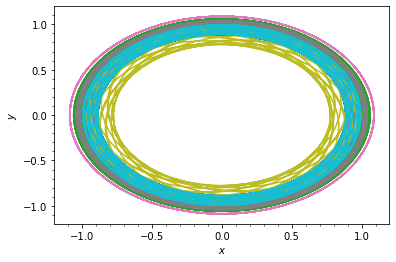

In [16]:
op.plot(d1='x',d2='y')

In [17]:

def alphafinder(a):
    
    g = lp(a)
    print(g)
    ts = np.linspace(0.,100.,1001)
    op.integrate(ts, g)


    voronoi = [ [] for i in range(10)]
    x1 = opp.x()
    y1 = opp.y()


    for k in range(len(op.x(ts))):

        x2 = op.x(ts)[:,k]
        y2 = op.y(ts)[:,k]

        for i in range(len(x2)): 
            sep = []
            for j in range(len(x1)): 
                if i != j:
                    seperation = np.sqrt((x2[j]-x[i])**2+(y2[j]-y[i])**2) 
                    sep.append(seperation)

            smallest = np.min(sep)
        #    print(sep.index(smallest))
            voronoi[sep.index(smallest)].append(1) 
            
            
            
    prob = [ [] for i in range(10)]
    for i in range(len(voronoi)):
        prob[i] = len(voronoi[i])/10
    #print(prob)


    loggedvoronoi = []
    for i in range(len(voronoi)):
        if prob[i] == 0:
            pass
        else:
            loggedvoronoi.append(np.log(prob[i]))
        
    Sum = 0
    for i in range(len(loggedvoronoi)):
        Sum += loggedvoronoi[i]
    
    return Sum 



In [18]:

print(alphafinder(2))

-3.9712635854724194


In [ ]:
a_arr = 
a0_arr = 

In [23]:
scipy.optimize.minimize(alphafinder(a_arr), a0_arr)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()